In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import os

In [ ]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 50
pd.options.display.precision = 2

path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Converting Total Charges to a numerical data type.
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
object_cols = [c for c in data.drop(['customerID'],axis=1).columns if data[c].dtype=='O']
object_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
yn_cols = []
for c in object_cols:
  val_counts = data[c].value_counts()
  if len(val_counts.index)==2 and all(val_counts.index.isin(['No', 'Yes'])):
    print(c)
    print(data[c].value_counts().to_string())
    yn_cols.append(c)


Partner
No     3641
Yes    3402
Dependents
No     4933
Yes    2110
PhoneService
Yes    6361
No      682
PaperlessBilling
Yes    4171
No     2872
Churn
No     5174
Yes    1869


In [ ]:
for c in yn_cols:
  data[c] = data[c].str.lower().map({'yes': 1, 'no': 0})

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7032.00,7043.00
mean,0.16,0.48,0.30,32.37,0.9,0.59,64.76,2283.30,0.27
std,0.37,0.50,0.46,24.56,0.3,0.49,30.09,2266.77,0.44
min,0.00,0.00,0.00,0.00,0.0,0.00,18.25,18.80,0.00
25%,0.00,0.00,0.00,9.00,1.0,0.00,35.50,401.45,0.00
50%,0.00,0.00,0.00,29.00,1.0,1.00,70.35,1397.47,0.00
75%,0.00,1.00,1.00,55.00,1.0,1.00,89.85,3794.74,1.00
max,1.00,1.00,1.00,72.00,1.0,1.00,118.75,8684.80,1.00


Text(0, 0.5, 'Count')

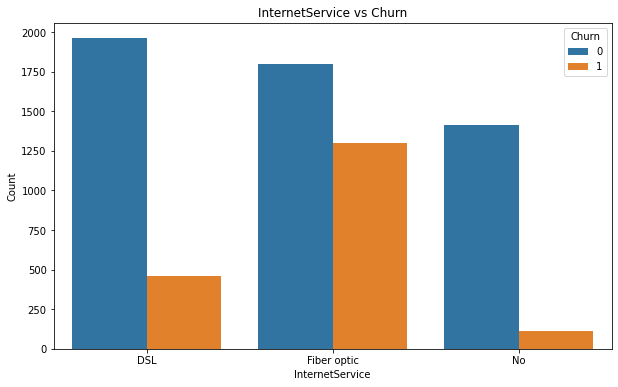

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10, 6))
pl = sns.countplot(x=data["InternetService"],hue=data["Churn"])
pl.set_title("InternetService vs Churn")
pl.set_xlabel("InternetService")
pl.set_ylabel("Count")

Text(0, 0.5, 'Count')

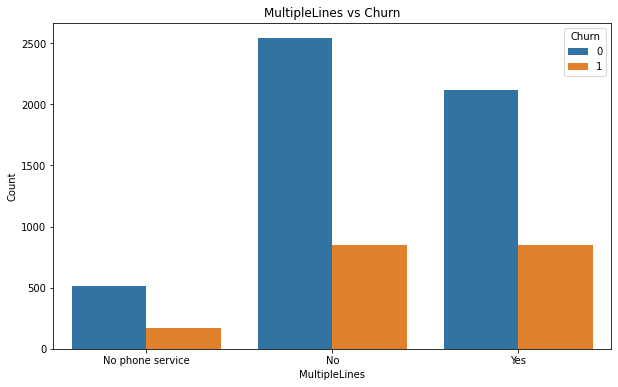

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
pl = sns.countplot(x=data["MultipleLines"],hue=data["Churn"])
pl.set_title("MultipleLines vs Churn")
pl.set_xlabel("MultipleLines")
pl.set_ylabel("Count")

Text(0, 0.5, 'Count')

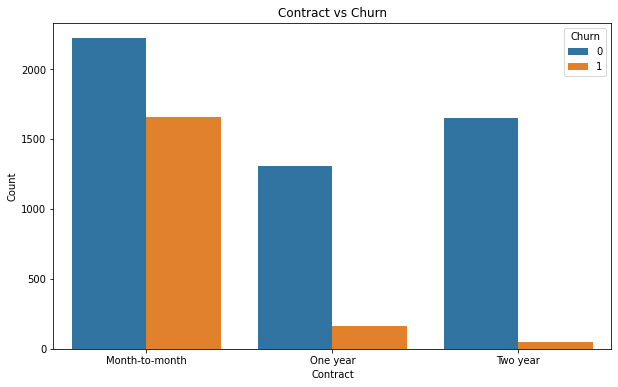

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
pl = sns.countplot(x=data["Contract"],hue=data["Churn"])
pl.set_title("Contract vs Churn")
pl.set_xlabel("Contract")
pl.set_ylabel("Count")

Text(0, 0.5, 'Count')

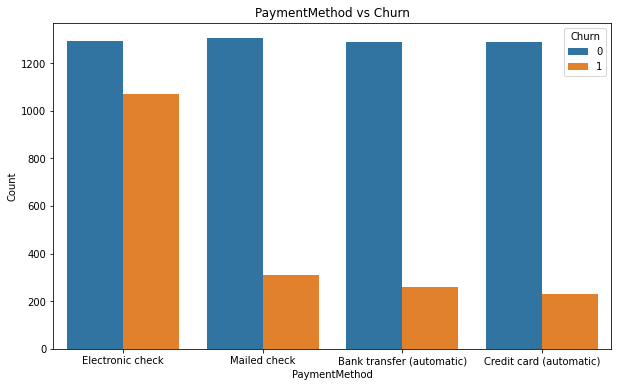

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
pl = sns.countplot(x=data["PaymentMethod"],hue=data["Churn"])
pl.set_title("PaymentMethod vs Churn")
pl.set_xlabel("PaymentMethod")
pl.set_ylabel("Count")

In [ ]:
# 1. Tenure: After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, 
# while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. 
# Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

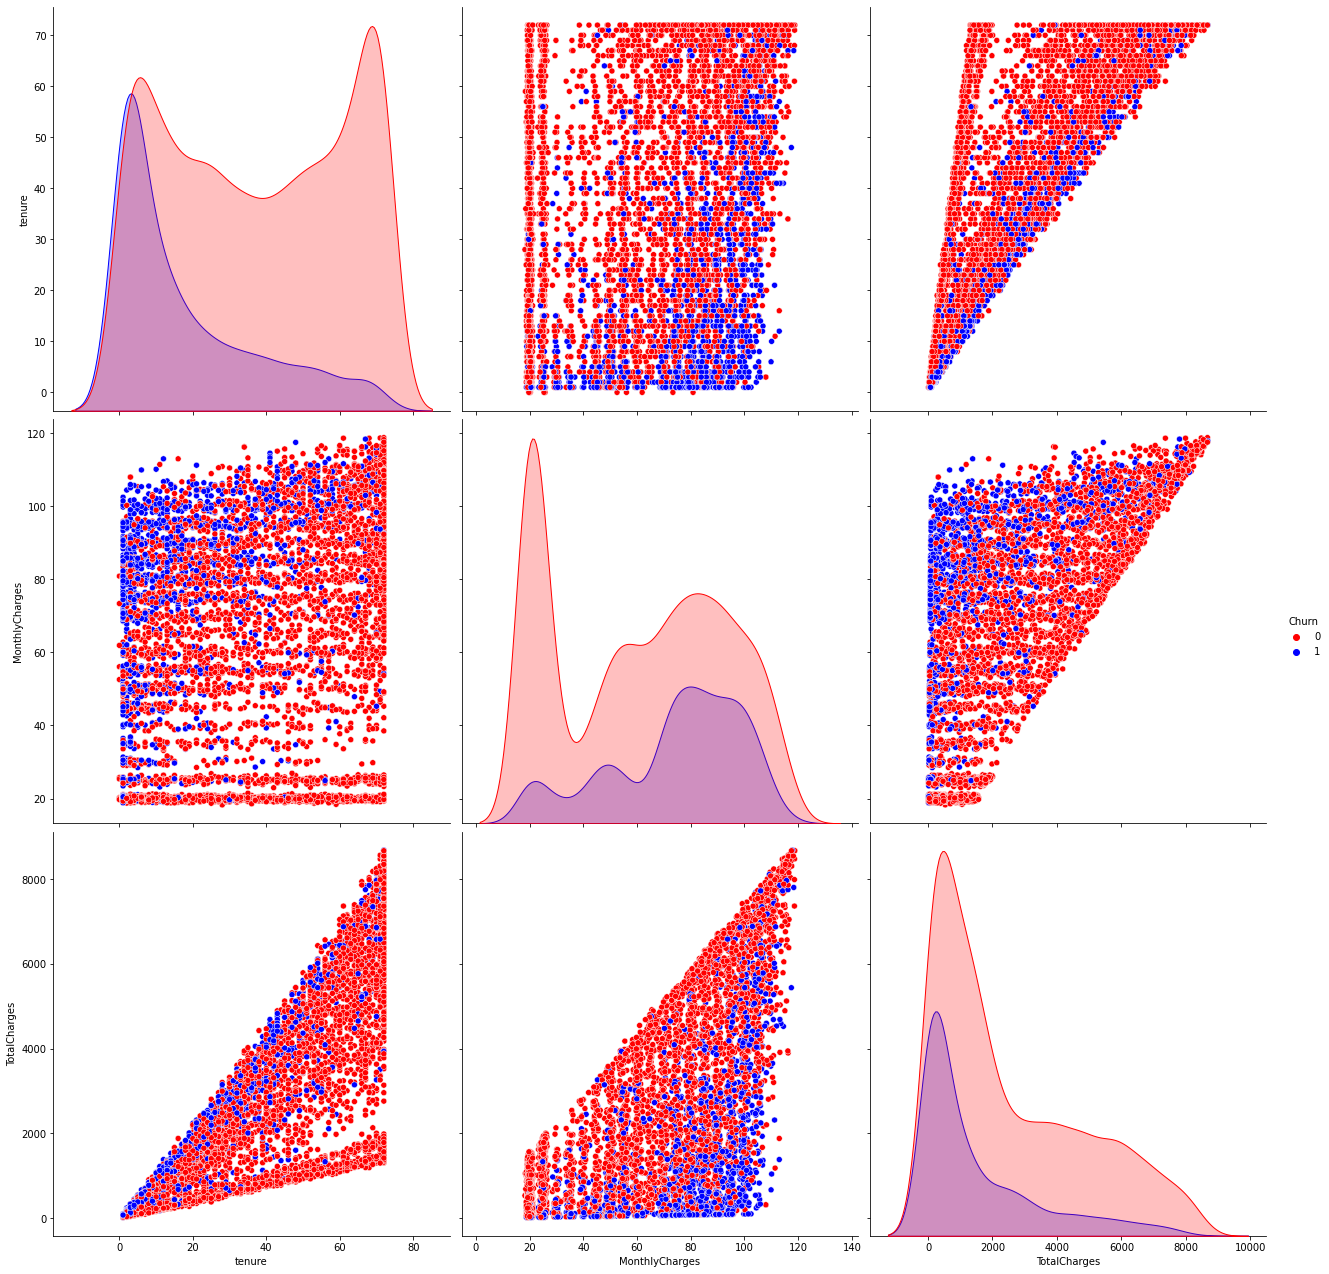

In [ ]:
# data[['tenure','Churn']].plot(kind='bar')
g = sns.pairplot(data[['tenure','MonthlyCharges', 'TotalCharges','Churn']], hue= "Churn",palette= (["red","blue"]),height=6)
# g._legend.set_bbox_to_anchor((0.5, 0.5))

In [ ]:
object_cols = [c for c in data.drop(['customerID'],axis=1).columns if data[c].dtype=='O']
object_cols

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [ ]:
df_dummies = pd.get_dummies(data[object_cols])
df_dummies.head()

,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
data = pd.concat([data.drop(object_cols+['Churn'],axis=1),df_dummies,data[['Churn']]],axis=1)
data

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,1,1,24,1,1,84.80,1990.50,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
7039,2234-XADUH,0,1,1,72,1,1,103.20,7362.90,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
7040,4801-JZAZL,0,1,1,11,0,1,29.60,346.45,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
7041,8361-LTMKD,1,1,0,4,1,1,74.40,306.60,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1


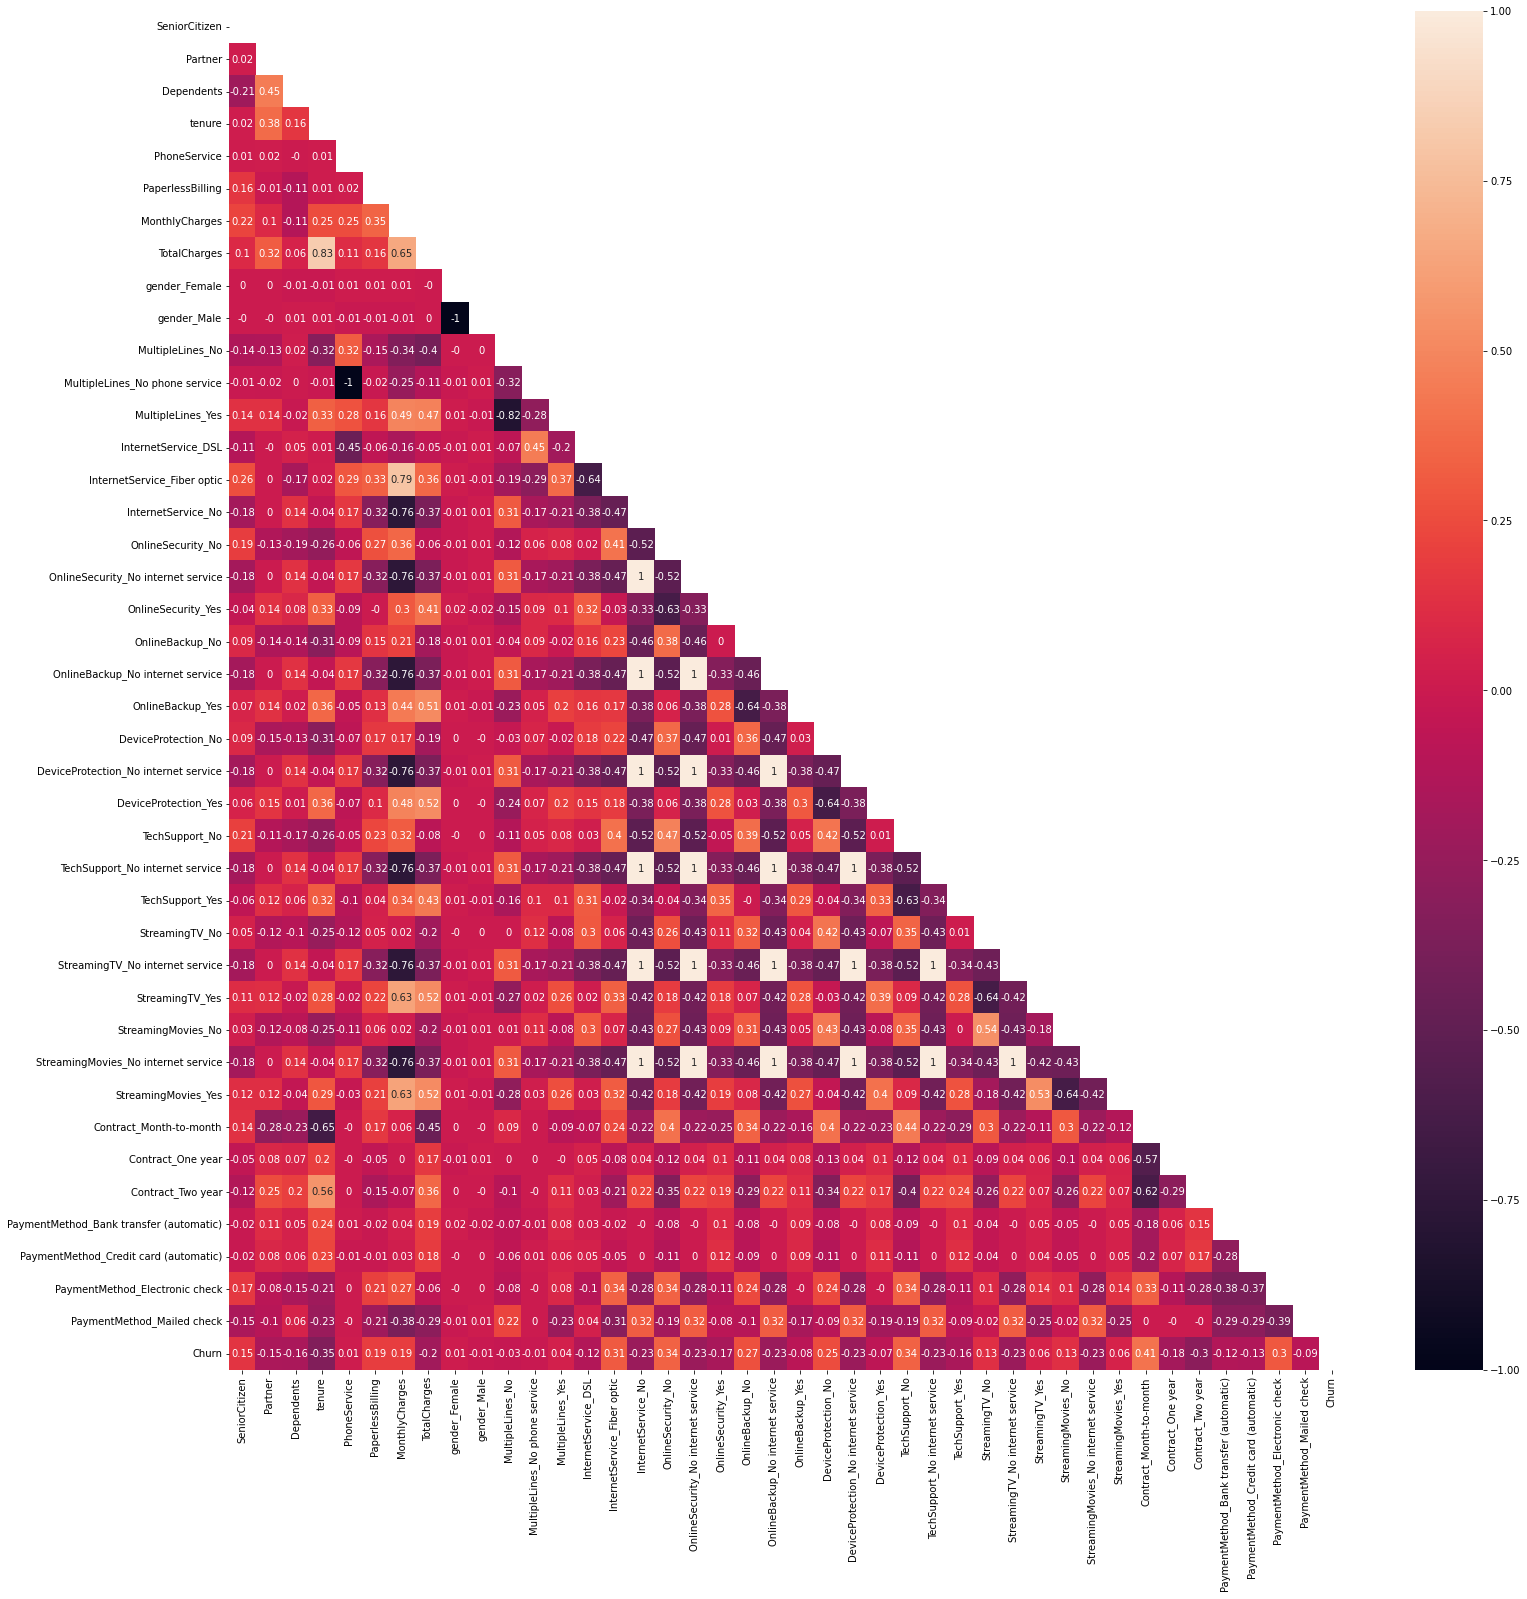

In [ ]:
import numpy as np
from matplotlib import colors

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(2)
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_corr, annot=True,ax=ax)  

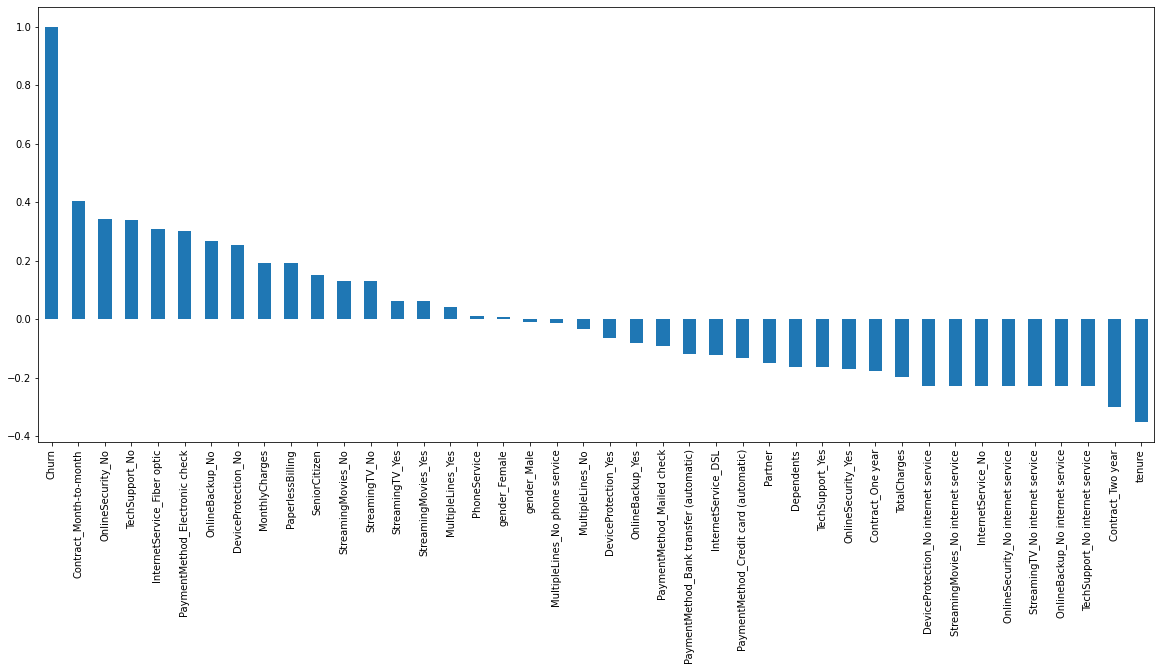

In [ ]:
churn_corr = data.corr()['Churn'].sort_values(ascending = False)
churn_corr.plot(kind='bar',figsize=(20,8))

In [ ]:
# After going through the above EDA we will develop some predictive models and compare them.
# We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

# 1. Logistic Regression

In [ ]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler

y = data['Churn'].values
x = data.drop(columns = ['customerID','Churn']).fillna(0)

scaler = MinMaxScaler(feature_range = (0,1))

x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.01,0.0,1.0,0.12,3.44e-03,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.47,1.0,0.0,0.39,2.18e-01,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.03,1.0,1.0,0.35,1.25e-02,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.62,0.0,0.0,0.24,2.12e-01,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.03,1.0,1.0,0.52,1.75e-02,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# It is important to scale the variables in logistic regression so that all of them are within a range of 0 to 1. 
# This helped me improve the accuracy from 79.7% to 80.7%. Further, you will notice below that the importance of variables 
# is also aligned with what we are seeing in Random Forest algorithm and the EDA we conducted above.

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=101)
# Running logistic regression model

model = LogisticRegression()
result = model.fit(x_train, y_train)

preds_lr = model.predict(x_test)
# Print the prediction accuracy
print(metrics.accuracy_score(y_test, preds_lr))

0.8059630856601988


In [ ]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],index=x_scaled.columns)

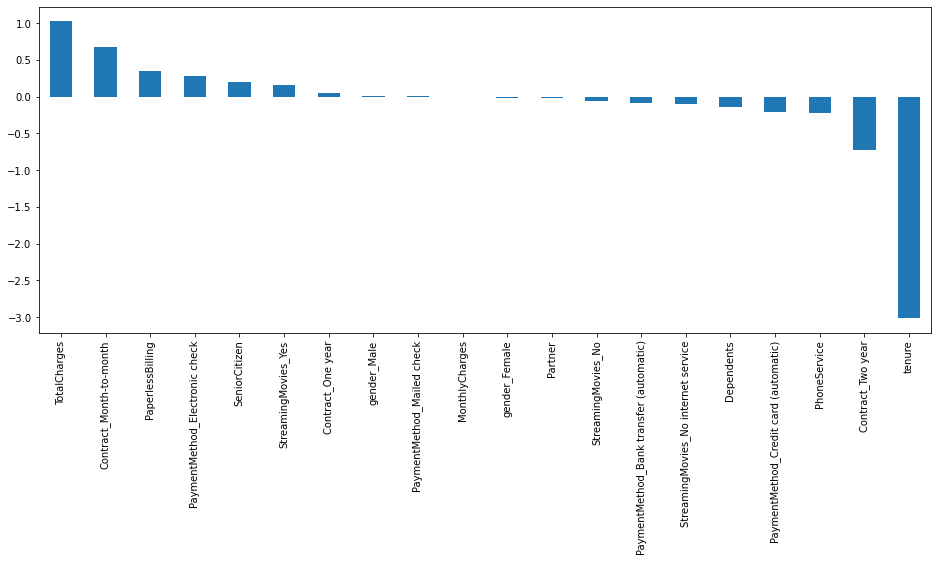

In [ ]:
pd.concat([weights.head(10),weights.tail(10)]).sort_values(ascending = False).plot(kind='bar',figsize=(16,6))

In [ ]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds_lr))  

[[1401  145]
 [ 265  302]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=750 , oob_score = True, 
                                  random_state =50, max_features = "auto",max_leaf_nodes = 15)
model_rf.fit(x_train, y_train)

# Make predictions
preds_rfc = model_rf.predict(x_test)
print(metrics.accuracy_score(y_test, preds_rfc))

0.8035967818267865


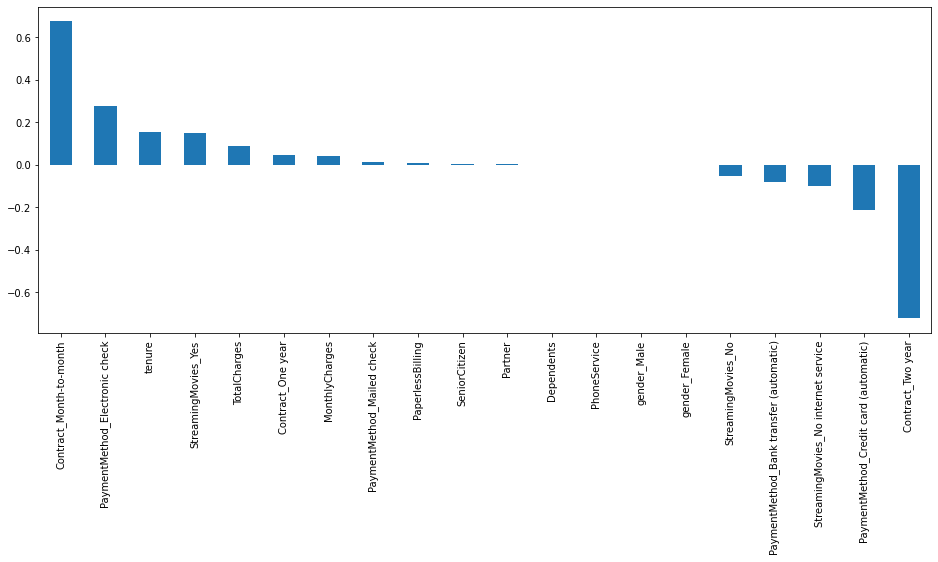

In [ ]:
importances = model_rf.feature_importances_
weights_rf = pd.Series(importances,index=x_scaled.columns)
pd.concat([weights_rf.head(10),weights.tail(10)]).sort_values(ascending = False).plot(kind='bar',figsize=(16,6))

In [ ]:
print(confusion_matrix(y_test,preds_rfc))  

[[1447   99]
 [ 316  251]]


In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear') 
model_svm.fit(x_train,y_train)
preds_svm = model_svm.predict(x_test)
metrics.accuracy_score(y_test, preds_svm)

0.8021769995267393

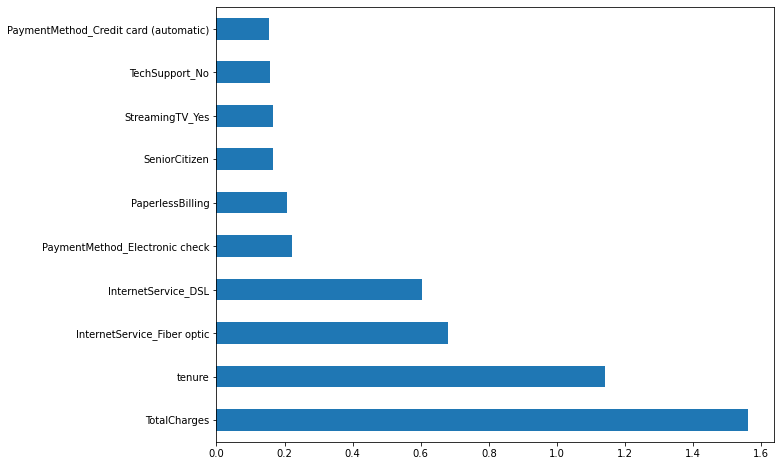

In [ ]:
# pd.Series(model_svm.coef_,index=x_scaled.columns)

pd.Series(abs(model_svm.coef_[0]), index=x_scaled.columns).nlargest(10).plot(kind='barh',figsize=(10,8))

In [ ]:
print(confusion_matrix(y_test,preds_svm))  

[[1400  146]
 [ 272  295]]
